In [1]:
import numpy as np
import pandas as pd
import re
import networkx as nx
import matplotlib.pyplot as plt
import jpype
from konlpy.tag import Hannanum
from konlpy.tag import Okt
from apyori import apriori

In [2]:
name=["박영선","오세훈"]
company=["hankyoreh","경향신문","동아일보","머니투데이","서울경제","조선일보","중앙일보","프레시안"]

In [3]:
hannanum = Hannanum()
data = pd.read_csv(name[1]+"_"+company[7]+".csv")
dataset = []
for i in data["content"]:
    dataset.append(hannanum.nouns(re.sub('[^가-힣a-zA-Z\s]','',i)))
result =(list(apriori(dataset,min_support=0.5)))
df=pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x : len(x))
df = df[(df['length']==2) & (df['support']>=0.1)].sort_values(by='support',ascending=False)
import matplotlib.font_manager as fm
from matplotlib import rc
font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

{'서울시장': Text(-0.14144647413806202, -0.09809684420184166, '서울시장'),
 '오세훈': Text(0.08131357237919636, -0.12963945912858793, '오세훈'),
 '것': Text(-0.009738393306071881, -0.03028748971949085, '것'),
 '일': Text(-0.04228802408316201, -0.15688180436254914, '일'),
 '국민의힘': Text(-0.16851059563436424, 0.13842065669892237, '국민의힘'),
 '후보': Text(-0.021761539729341146, 0.1666627817560553, '후보'),
 '오': Text(0.06338501275692057, 0.3965118080992825, '오'),
 '보궐선거': Text(-0.08305014320691258, 0.3818672171365, '보궐선거'),
 '이': Text(0.49634116470370654, -0.0826031679888862, '이'),
 '전': Text(0.35086448643991397, 0.3388041985316709, '전'),
 '수': Text(0.35976339328975243, 0.0756509087437194, '수'),
 '말': Text(0.2829675452791382, 0.5407177197706647, '말'),
 '등': Text(0.6143183829625709, 0.11963978598292141, '등'),
 '이날': Text(0.5792493536640942, 0.3134319758431525, '이날'),
 '이번': Text(-0.18677404825631688, 0.726042139520376, '이번'),
 '선거': Text(0.20172589105074631, -0.4010119753866952, '선거'),
 '저': Text(-0.33436354020926

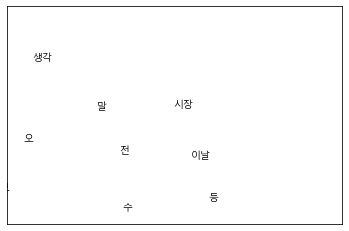

In [4]:
G = nx.Graph()
ar=(df['items']); G.add_edges_from(ar)
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize))/(max(nsize)-min(nsize))
pos = nx.spring_layout(G,k=0.15)
nx.draw_networkx_labels(G,pos,font_family=font_name,font_size=10)



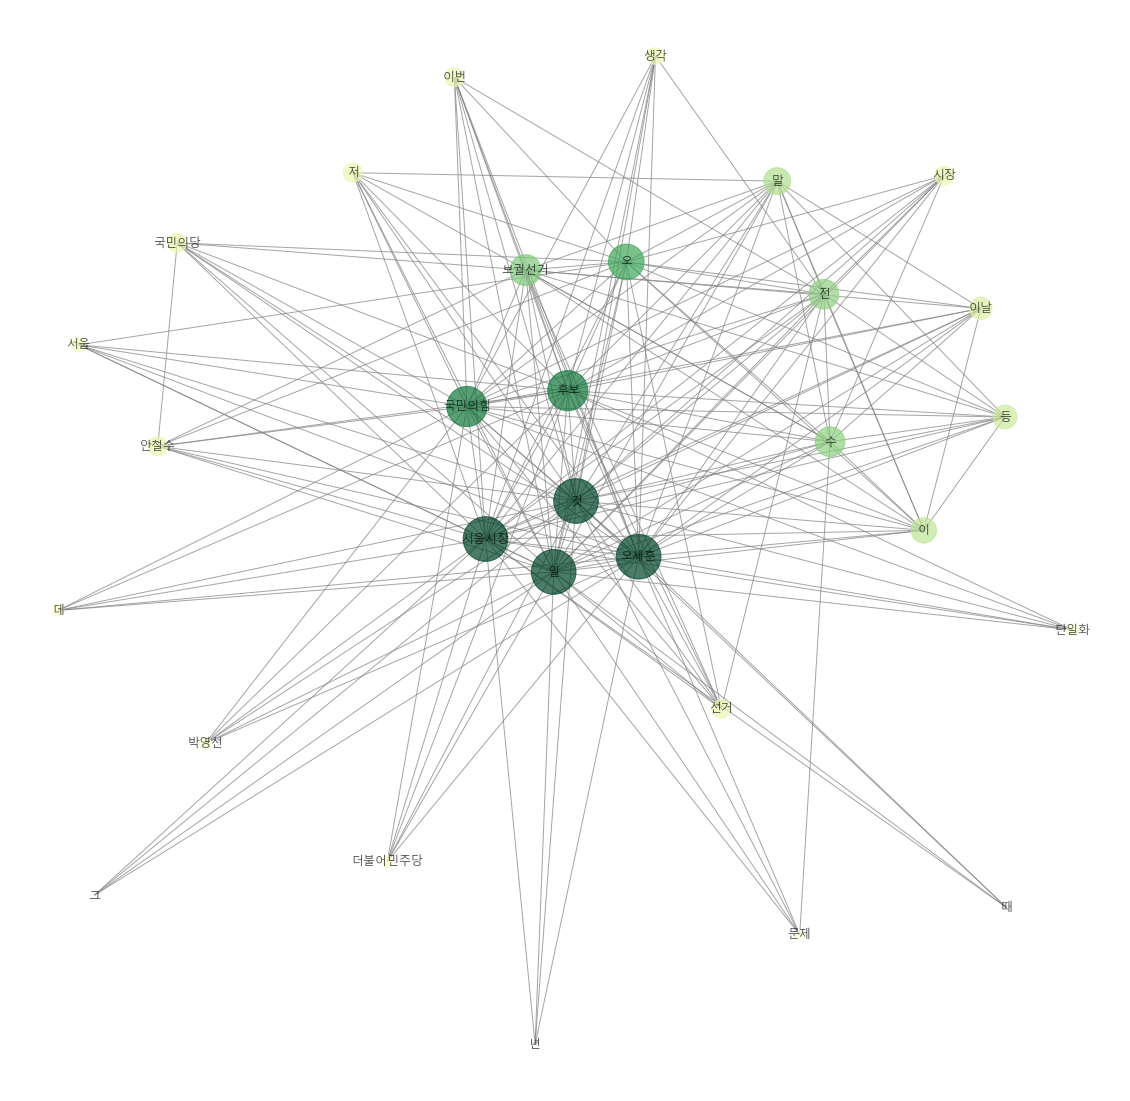

In [5]:
plt.figure(figsize=(20,20))
nx.draw_networkx(G,font_family=font_name,font_size=12,pos=pos,
                 node_color=list(pr.values()),node_size=nsize,width=1,
                 alpha=0.7,edge_color='.5',cmap=plt.cm.YlGn)
plt.axis('off')
plt.savefig(name[1]+"_"+company[6]+".png", bbox_inches="tight")
plt.show() 